In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.
In this notebook, you will load historical Canadian Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

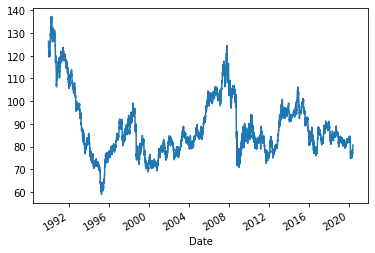

In [4]:
# Plot just the "Price" column from the dataframe:
# YOUR CODE HERE!
cad_jpy_df.Price.plot()

**Question:** Do you see any patterns, long-term and/or short? 

**Answer:** long-term

---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the exchange rate price into trend and noise.

In [5]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
# YOUR CODE HERE!
ts_noise, ts_trend = sm.tsa.filters.hpfilter(cad_jpy_df['Price'])

In [6]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
# YOUR CODE HERE!
newdf = cad_jpy_df[['Price']].copy()
newdf['noise'] = ts_noise
newdf['trend'] = ts_trend
newdf.head()


,Price,noise,trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


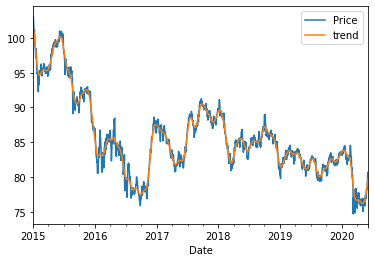

In [7]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!
ptdf= newdf.drop(['noise'], axis= 1)
ptdf.head()
ptdf1= ptdf.loc["2015-01-01":, :]
ptdf1.plot()


**Question:** Do you see any patterns, long-term and/or short?

**Answer:** YOUR ANSWER HERE

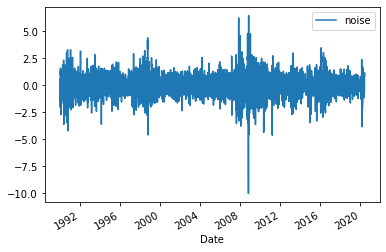

In [8]:
# Plot the Settle Noise
# YOUR CODE HERE!
ptdf2= newdf['noise'] .to_frame()
ptdf2.plot()

---

# Forecasting Returns using an ARMA Model

Using exchange rate *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [9]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [10]:
import statsmodels.api as sm

# Estimate and ARMA model using statsmodels (use order=(2, 1))
# YOUR CODE HERE!
from statsmodels.tsa.arima_model import ARMA
model = ARMA(returns.values, order=(2,1))

# Fit the model and assign it to a variable called results
# YOUR CODE HERE!
results = model.fit()

In [11]:
# Output model summary results:
# YOUR CODE HERE!
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7928
Model:                     ARMA(2, 1)   Log Likelihood               -9751.978
Method:                       css-mle   S.D. of innovations              0.828
Date:                Sun, 17 Jan 2021   AIC                          19513.955
Time:                        20:46:14   BIC                          19548.846
Sample:                             0   HQIC                         19525.903
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.009     -0.245      0.807      -0.020       0.016
ar.L1.y       -0.8548      0.164     -5.201      0.000      -1.177      -0.533
ar.L2.y       -0.0197      0.013     -1.475      0.140      -0.046       0.006
ma.L1.y        0.8246      0.164      5.031      0.000       0.503       1.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2033           +0.0000j            1.2033            0.5000
AR.2          -42.1696           +0.0000j           42.1696            0.5000
MA.1           -1.2127           +0.0000j            1.2127            0.5000
-----------------------------------------------------------------------------
"""

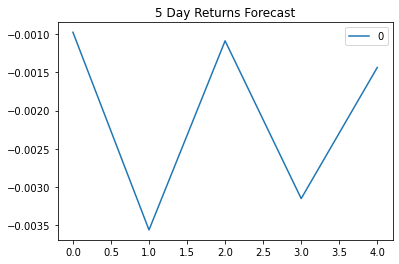

In [12]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="5 Day Returns Forecast")

**Question:** Based on the p-value, is the model a good fit?

**Answer:** not a good fit

---

# Forecasting the Exchange Rate Price using an ARIMA Model

 1. Using the *raw* CAD/JPY exchange rate price, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Plot a 5 day forecast for the Exchange Rate Price. What does the model forecast predict will happen to the Japanese Yen in the near term?

In [13]:
returns.head()

,Price
Date,
1990-01-03,-0.846720
1990-01-04,-1.468476
1990-01-05,0.874777
1990-01-08,-0.216798
1990-01-09,0.667901


In [14]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!

model2 = ARIMA(returns.values, order=(5, 1, 1))

# Fit the model
# YOUR CODE HERE!
results2 = model2.fit()

C:\Users\Sonali Goyal\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [15]:
# Output model summary results:
# YOUR CODE HERE!
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 7927
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -9754.554
Method:                       css-mle   S.D. of innovations              0.828
Date:                Sun, 17 Jan 2021   AIC                          19525.109
Time:                        20:46:27   BIC                          19580.933
Sample:                             1   HQIC                         19544.225
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.835e-06   4.72e-06      0.601      0.548   -6.42e-06    1.21e-05
ar.L1.D.y     -0.0237      0.011     -2.112      0.035      -0.046      -0.002
ar.L2.D.y      0.0024      0.011      0.210      0.834      -0.020       0.024
ar.L3.D.y     -0.0075      0.011     -0.668      0.504      -0.030       0.015
ar.L4.D.y      0.0036      0.011      0.323      0.747      -0.018       0.026
ar.L5.D.y     -0.0160      0.011     -1.427      0.154      -0.038       0.006
ma.L1.D.y     -0.9997      0.001  -1572.009      0.000      -1.001      -0.998
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1742           -0.0000j            2.1742           -0.5000
AR.2           -0.6712           -2.1995j            2.2997           -0.2971
AR.3           -0.6712           +2.1995j            2.2997            0.2971
AR.4            1.8716           -1.3862j            2.3290           -0.1015
AR.5            1.8716           +1.3862j            2.3290            0.1015
MA.1            1.0003           +0.0000j            1.0003            0.0000
-----------------------------------------------------------------------------
"""

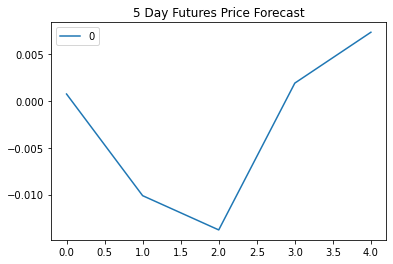

In [16]:
# Plot the 5 Day Price Forecast
# YOUR CODE HERE!
pd.DataFrame(results2.forecast(steps=5)[0]).plot(title="5 Day Futures Price Forecast")


**Question:** What does the model forecast will happen to the Japanese Yen in the near term?

**Answer:** YOUR ANSWER HERE

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen exchange rate returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using exchange rate *Returns*, estimate a GARCH model. **Hint:** You can reuse the `returns` variable from the ARMA model section.

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [17]:
from arch import arch_model

In [18]:
# Estimate a GARCH model:
# YOUR CODE HERE!
model = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)

# Fit the model
# YOUR CODE HERE!
res = model.fit(disp="off")

In [19]:
# Summarize the model results
# YOUR CODE HERE!
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17828.0
Method:            Maximum Likelihood   BIC:                           17849.0
                                        No. Observations:                 7928
Date:                Sun, Jan 17 2021   Df Residuals:                     7925
Time:                        20:57:01   Df Model:                            3
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      9.0734e-03  2.401e-03      3.779  1.573e-04 [4.368e-03,1.378e-02]
alpha[1]       0.0624  9.003e-03      6.936  4.035e-12 [4.480e-02,8.009e-02]
beta[1]        0.9243  1.110e-02     83.250      0.000     [  0.903,  0.946]
============================================================================

Covariance estimator: robust
"""

**Note:** Our p-values for GARCH and volatility forecasts tend to be much lower than our ARMA/ARIMA return and price forecasts. In particular, here we have all p-values of less than 0.05, except for alpha(2), indicating overall a much better model performance. In practice, in financial markets, it's easier to forecast volatility than it is to forecast returns or prices. (After all, if we could very easily predict returns, we'd all be rich!)

In [21]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [22]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
# YOUR CODE HERE!
forecasts = res.forecast(start='2009-12-31', horizon=forecast_horizon)
forecasts

In [23]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2009-12-31,14.256618,14.242308,14.228174,14.214214,14.200426
2010-01-01,13.800078,13.791452,13.782935,13.774526,13.766223
2010-01-04,13.505078,13.500219,13.495422,13.490687,13.486014
2010-01-05,13.419308,13.415558,13.411857,13.408204,13.404599
2010-01-06,14.244918,14.230752,14.216760,14.202940,14.189290


In [27]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2009-12-31,2010-01-01,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,...,2020-05-22,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-06-01,2020-06-02,2020-06-03,2020-06-04
h.1,14.256618,13.800078,13.505078,13.419308,14.244918,14.113687,13.704519,13.794079,15.047918,15.452058,...,12.390411,12.026518,12.832509,12.505085,12.125747,11.759354,12.440148,13.315592,12.975378,12.566007
h.2,14.242308,13.791452,13.500219,13.415558,14.230752,14.101139,13.697105,13.785529,15.024135,15.423602,...,12.400552,12.041857,12.836544,12.513621,12.139653,11.778618,12.449591,13.313194,12.977486,12.573696
h.3,14.228174,13.782935,13.495422,13.411857,14.216760,14.088746,13.689785,13.777087,15.000631,15.395472,...,12.410550,12.056974,12.840525,12.522038,12.153358,11.797595,12.458902,13.310827,12.979566,12.581279
h.4,14.214214,13.774526,13.490687,13.408204,14.202940,14.076507,13.682558,13.768752,14.977402,15.367664,...,12.420408,12.071871,12.844451,12.530338,12.166866,11.816291,12.468082,13.308491,12.981618,12.588757
h.5,14.200426,13.766223,13.486014,13.404599,14.189290,14.064419,13.675423,13.760522,14.954446,15.340176,...,12.430128,12.086553,12.848325,12.538523,12.180181,11.834710,12.477135,13.306186,12.983642,12.596132


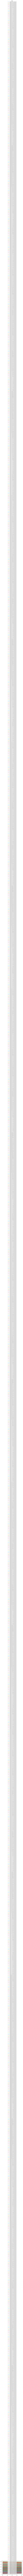

In [28]:
# Plot the final forecast
# YOUR CODE HERE!
final.plot()

**Question:** What does the model forecast will happen to volatility in the near term?

**Answer:** YOUR ANSWER HERE

---

# Conclusions

1. Based on your time series analysis, would you buy the yen now?

    * YOUR ANSWER HERE

2. Is the risk of the yen expected to increase or decrease?
    * YOUR ANSWER HERE

3. Based on the model evaluation, would you feel confident in using these models for trading?
    * YOUR ANSWER HERE